# Experimento 1

Requisitos:

- **Amplitude**: 1 V  
- **Frequência**: 10 kHz  
- **Ferramenta**: Python (Jupyter Notebook)  
- **Bibliotecas**: numpy e matplotlib  

In [597]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Definição dos parâmetros

In [598]:
A = 1            # Amplitude da onda (em Volts)
f = 10e3         # Frequência da onda (10 kHz)
T = 1 / f        # Período da onda
fs = 1e6         # Frequência de amostragem (1 MHz) -> muito maior que 2*f (Nyquist)
t_final = 5*T    # Duração da simulação (5 períodos da onda)

## Geração do vetor de tempo

In [599]:
t = np.arange(0, t_final, 1/fs)  # vetor de tempo de 0 até t_final, com passo de 1/fs


## Cálculo da onda senoidal

In [600]:
seno = A * np.sin(2 * np.pi * f * t)

## Plotagem do gráfico

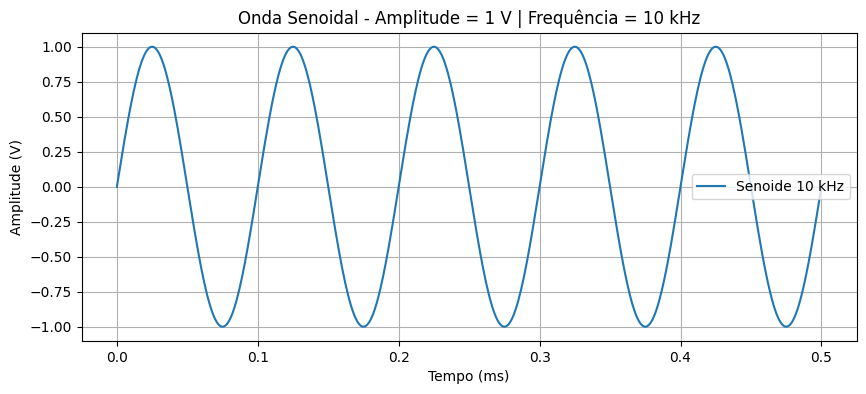

In [601]:
plt.figure(figsize=(10,4))  # tamanho da figura
plt.plot(t*1e3, seno, label="Senoide 10 kHz")  # eixo x em ms

# Adicionando rótulos e título
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude (V)")
plt.title("Onda Senoidal - Amplitude = 1 V | Frequência = 10 kHz")
plt.grid(True)
plt.legend()
plt.show()

### Análise e Discussão dos Resultados

Geramos um sinal senoidal com bastante amostras. O gráfico saiu suave e bem parecido com uma senoide contínua. Ou seja, conseguimos representar o sinal de forma fiel.

# Experimento 2

Requisitos:
- **Amplitude:** 1 V  
- **Frequência:** 10 kHz  
- **Número de amostras:** 100  
- **Ferramenta:** Python (Jupyter Notebook)  
- **Bibliotecas:** numpy e matplotlib  

## Definição dos parâmetros

In [602]:
# Reuso dos parâmetros do experimento 1
# A = 1          # Amplitude (V)
# f = 10e3       # Frequência (Hz)
# T = 1 / f      # Período da onda (s)
N = 100        # Número de amostras

## Geração do vetor de tempo

In [603]:
# Geramos 100 pontos igualmente espaçados em 1 período
t = np.linspace(0, T, N, endpoint=False)

## Cálculo da onda senoidal

In [604]:
seno = A * np.sin(2 * np.pi * f * t)

## Exibição dos dados em uma tabela

In [605]:
df = pd.DataFrame({
    "Tempo (µs)": t*1e6,    # tempo em microssegundos
    "Amplitude (V)": seno
})
display(df)  # Mostra a tabela bonitinha no notebook

,Tempo (µs),Amplitude (V)
0,0.0,0.000000
1,1.0,0.062791
2,2.0,0.125333
3,3.0,0.187381
4,4.0,0.248690
...,...,...
95,95.0,-0.309017
96,96.0,-0.248690
97,97.0,-0.187381
98,98.0,-0.125333


## Plotagem do gráfico

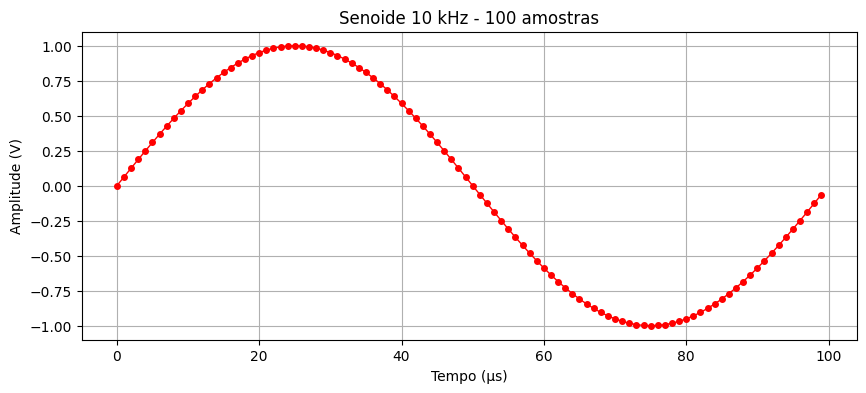

In [606]:
plt.figure(figsize=(10, 4))
plt.plot(t * 1e6, seno, 'r-o', linewidth=1, markersize=4)  # linha + marcador
plt.xlabel("Tempo (µs)")
plt.ylabel("Amplitude (V)")
plt.title("Senoide 10 kHz - 100 amostras")
plt.grid(True)
plt.show()


### Análise e Discussão dos Resultados

Usamos apenas 100 amostras. O sinal ainda ficou bom, dá para reconhecer claramente a senoide, mas já não é tão suave quanto no primeiro. Mesmo assim, é uma solução aceitável para representar o sinal sem precisar de tantos pontos.

# Experimento 3: Representação Senoidal com stem()

Neste experimento vamos repetir o **Experimento 2**, mas destacando o uso da função **stem()** para visualizar a senoide discretizada.


Como no experimento anterior, começamos definindo os parâmetros da senoide e gerando o vetor de tempo, para depois calcular a senoide. neste experimento, não faremos mudanças nessas etapas. Apenas faremos alterações na exibição dos dados e na plotagem do gráfico.

## Definição dos parâmetros, geração do vetor de tempo e cálculo da onda senoidal

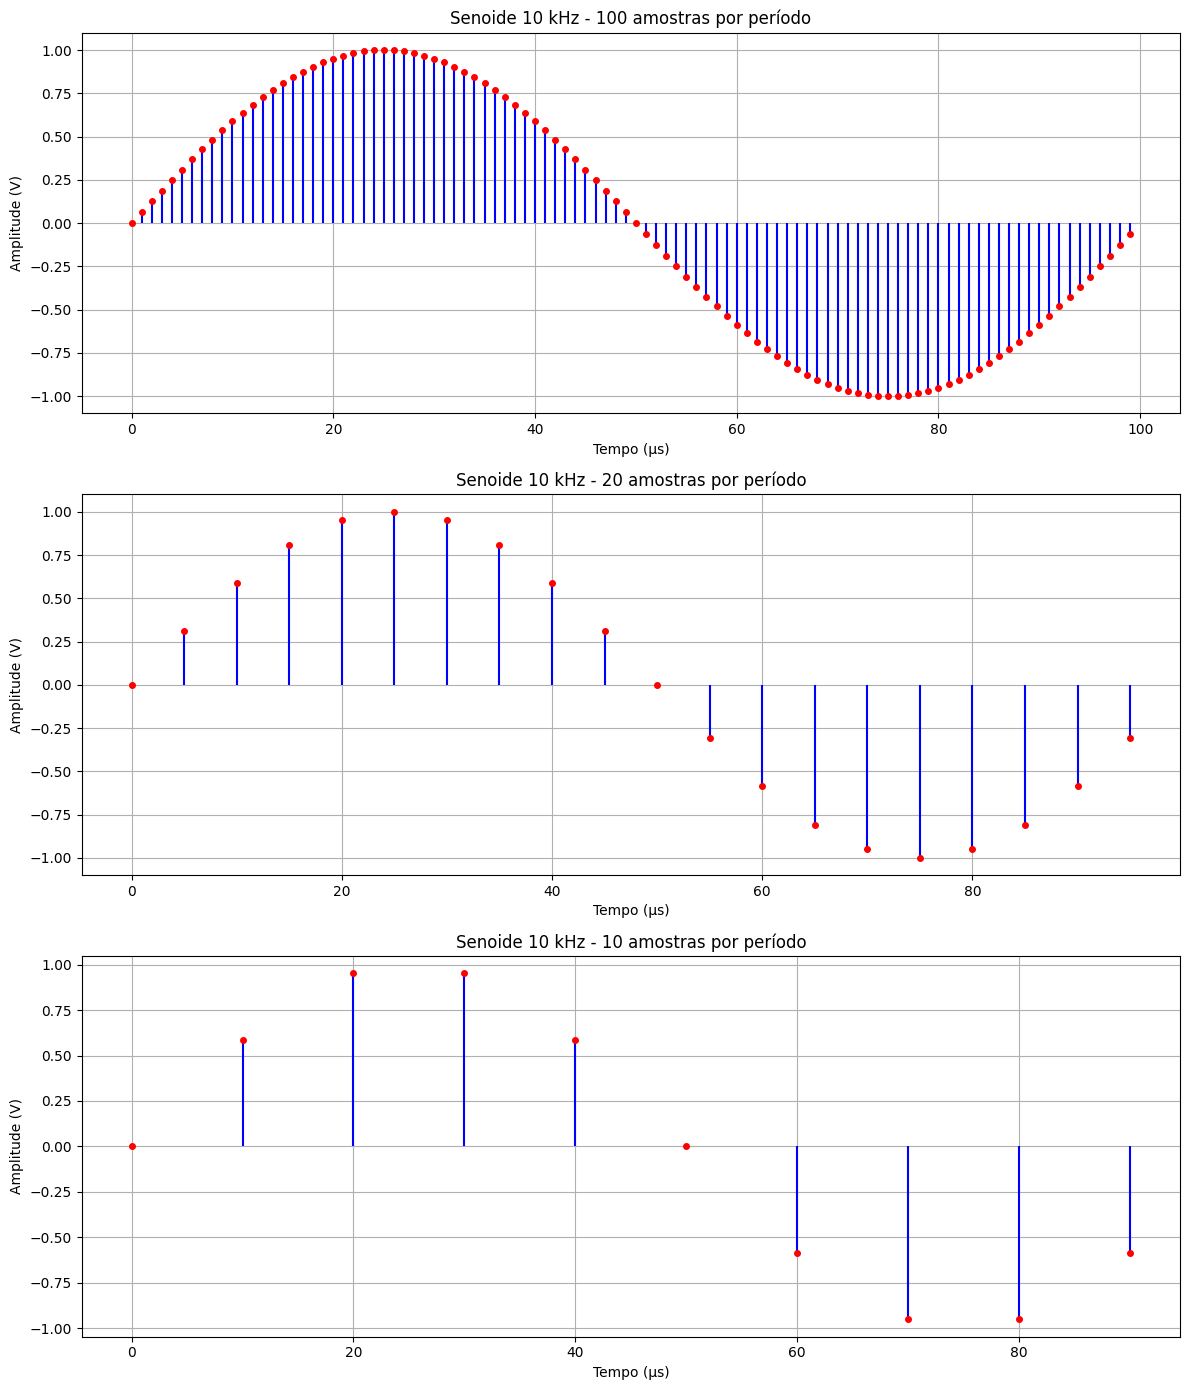

In [607]:
N_values = [100, 20, 10]

plt.figure(figsize=(12,14))  # figura mais larga

for i, N in enumerate(N_values, 1):
    # Vetor tempo para 1 período
    t = np.linspace(0, T, N, endpoint=False)
    seno = A * np.sin(2 * np.pi * f * t)
    
    # Subplot
    plt.subplot(len(N_values), 1, i)
    (markerline, stemlines, baseline) = plt.stem(t*1e6, seno, basefmt=" ")
    plt.setp(markerline, color="red", markersize=4)
    plt.setp(stemlines, color="blue")
    
    plt.xlabel("Tempo (µs)")
    plt.ylabel("Amplitude (V)")
    plt.title(f"Senoide 10 kHz - {N} amostras por período")
    plt.grid(True)

plt.tight_layout()
plt.show()

### Análise e Discussão dos Resultados

Usamos ainda menos amostras e mostramos com o gráfico de stem. Aqui fica bem mais visível cada ponto separado, a curva já não aparece suave e parece mais “picotada”. Mostra que, quanto menos amostras, mais difícil é enxergar a forma exata do sinal. Mas dependendo da aplicação, pode ser suficiente.